# Stepik ML contest 

## Анализ посещаемости курса по R и пресказание оттока студентов

https://stepik.org/lesson/222124/step/1?unit=195045
https://stepik.org/lesson/222126/step/1?unit=195047
https://stepik.org/lesson/223834/step/1?unit=196653

In [4]:
import pandas as pd
import numpy as np

In [5]:
# датасет с действиями пользователей курса по R

event_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip')
event_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [6]:
# уникальные действия пользователей

event_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [7]:
# переведем время из unix-формата в обычную дату/врепя

event_data['data'] = pd.to_datetime(event_data.timestamp, unit = 's')
event_data.head()

,step_id,timestamp,action,user_id,data
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [8]:
# дата/время первой активности на курсе

event_data.data.min()

Timestamp('2015-06-15 04:00:48')

In [9]:
# дата/время последней активности на курсе (для предоставленного датасета)

event_data.data.max()

Timestamp('2018-05-19 23:33:31')

In [10]:
# добавим колонку с датой (без времени)

event_data['day'] = event_data.data.dt.date
event_data.head()

,step_id,timestamp,action,user_id,data,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [11]:
# посчитаем количество уникальных посетителей по дням

event_data.groupby('day').user_id.nunique().head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

<AxesSubplot:xlabel='day'>

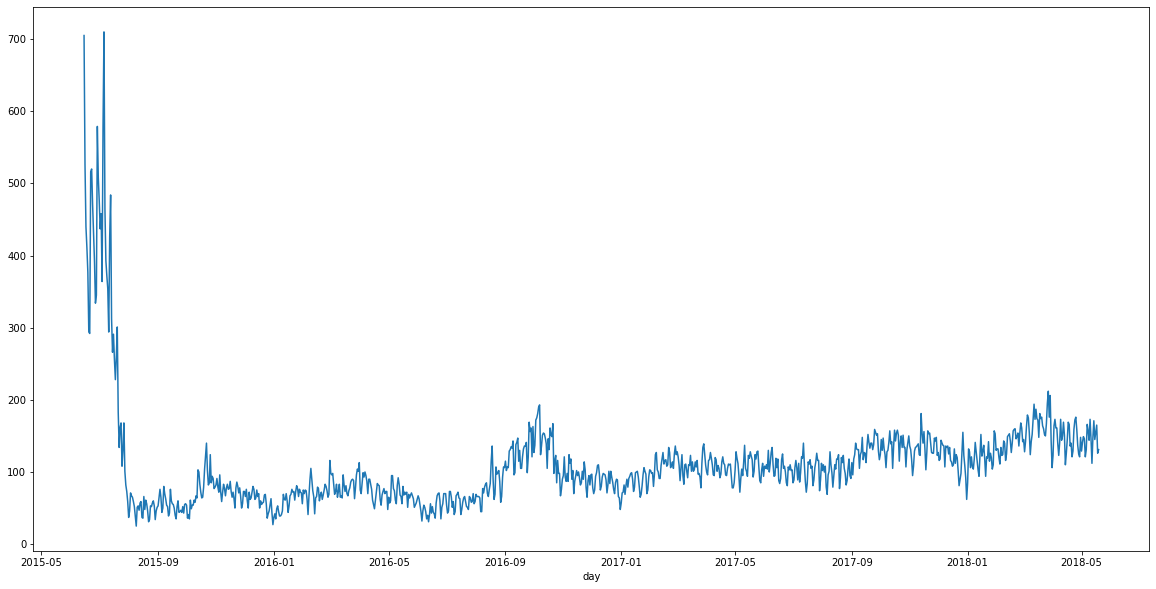

In [12]:
# визуализируем это количество

event_data.groupby('day').user_id.nunique().plot(figsize = (20,10))

<AxesSubplot:>

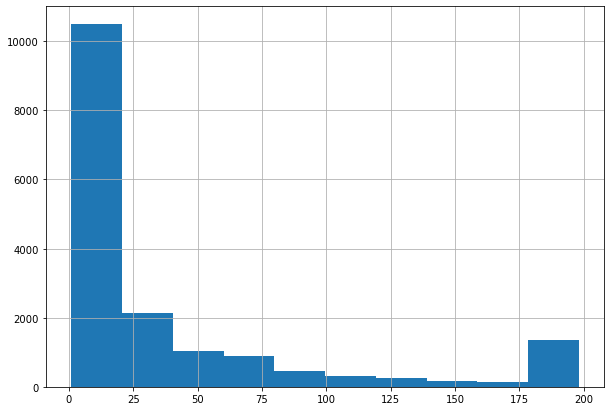

In [13]:
# распределение пользователей, которые решили хотя бы одну задачу

(event_data[event_data.action == 'passed'].groupby('user_id', as_index = False)
                                          .agg({'step_id': 'count'})
                                          .rename(columns = {'step_id': 'passed_counts'})
                                          .passed_counts
                                          .hist(figsize = (10,7)))

In [14]:
# минимальное количество решенных задач пользователем

(event_data[event_data.action == 'passed'].groupby('user_id', as_index = False)
                                          .agg({'step_id': 'count'})
                                          .rename(columns = {'step_id': 'passed_counts'})
                                          .passed_counts
                                          .min())

1

In [15]:
# вывод данных с учетом пользователей, которые не решили ни одной задачи на курсе по R

event_data.pivot_table(index='user_id', 
                       columns='action', 
                       values='step_id', 
                       aggfunc='count', 
                       fill_value=0).reset_index().head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


<AxesSubplot:>

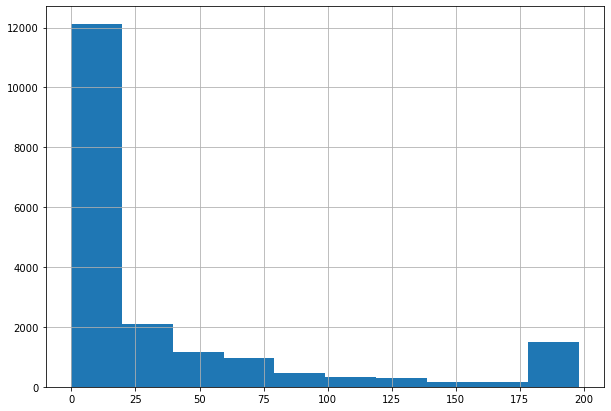

In [16]:
# построим распределение по всем пользователям (а не только по тем, у которых есть решенные степы)

(event_data.pivot_table(index='user_id', 
                       columns='action', 
                       values='step_id', 
                       aggfunc='count', 
                       fill_value=0).reset_index()
                                    .discovered
                                    .hist(figsize = (10,7)))

In [17]:
# сохраним данные по событиям всех пользователей в виде pivot table

users_events_data = event_data.pivot_table(index='user_id', 
                       columns='action', 
                       values='step_id', 
                       aggfunc='count', 
                       fill_value=0).reset_index()
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [18]:
# датасет с ответами студентов на задания курса по R

submissions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [19]:
# добавим колонки с датой/временем и датой ответов

submissions_data['data'] = pd.to_datetime(submissions_data.timestamp, unit = 's')
submissions_data['day'] = submissions_data.data.dt.date

In [20]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,data,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [21]:
# данные по количеству верно/не верно решенных задач пользователями

user_scores = submissions_data.pivot_table(index='user_id', 
                       columns='submission_status', 
                       values='step_id', 
                       aggfunc='count', 
                       fill_value=0).reset_index()

In [22]:
user_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [23]:
# расчет данных, которые представляют собой разницу во времени в формате Unix между посещениями курса по R пользователями

gap_data = (event_data[['user_id', 'timestamp', 'day']].drop_duplicates(subset=['user_id', 'day'])
                                           .groupby('user_id')['timestamp']
                                           .apply(list)
                                           .apply(np.diff) # diff - метод numpy, которые рассчитывает разницу между знач. списка
                                           .values)

In [24]:
# преобразование массива массивов в массив значений

gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [25]:
# разница во времени между посещениями курса по R в днях

gap_data = gap_data / (24 * 60 * 60)

<AxesSubplot:>

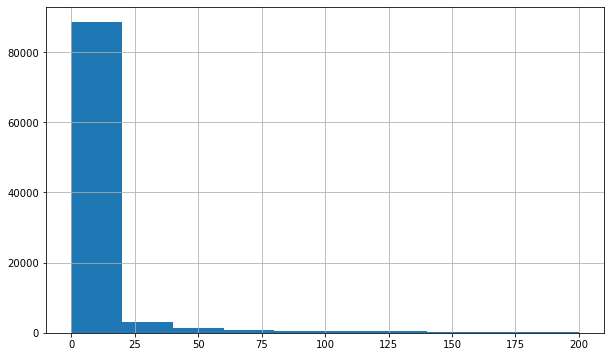

In [26]:
# распределение, на котором кидно, что большая часть лежит в первой паре месяцев

gap_data[gap_data < 200].hist(figsize = (10, 6))

In [27]:
# только 5% пользователей возвращались к прохождению курса спустя 59 дней

gap_data.quantile(0.95)

59.760440972222156

In [28]:
# последние пять записей датасета демонсрируют даты окончания курса (для самопроверки)

event_data.tail()

,step_id,timestamp,action,user_id,data,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [29]:
# данные пользователей сгруппированые по user_id и максимальными значениями timestamp

user_data = (event_data.groupby('user_id', as_index = False)
           .agg({'timestamp': 'max'})
           .rename(columns = {'timestamp': 'last_timestamp'}))

In [30]:
# "текущее" время - на момент выгрузки датасета

now = event_data.timestamp.max()

In [31]:
# предположительное пороговое время, после которого считаем, что пользователь с курса ушел (30 дней)

drop_out_threshold = 30 * 24 * 60 * 60

In [32]:
# добавим колонку в которой определим, какие из пользователей ушли с курса

user_data['is_gone'] = (now - user_data.last_timestamp) > drop_out_threshold
user_data.head()

,user_id,last_timestamp,is_gone
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [33]:
# добавим к пользовательским данным информацию по количеству верных/неверных ответов

user_data = user_data.merge(user_scores, how = 'left').fillna(0)
user_data.head()

,user_id,last_timestamp,is_gone,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


In [34]:
# добавим к пользовательским данным информацию по событиям

user_data = user_data.merge(users_events_data, how = 'left').fillna(0) 
user_data.head()

,user_id,last_timestamp,is_gone,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


In [35]:
# посчитаем уникальное количество дней присутствия на Stepic для пользователей

user_days = (event_data.groupby('user_id')
                       .day.nunique()
                       .to_frame()
                       .reset_index())

In [36]:
# добавим к таблице пользователей данные по дням

user_data = user_data.merge(user_days, how = 'left').fillna(0)
user_data.head()

,user_id,last_timestamp,is_gone,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [37]:
# определим пользователей прошедших курс (все 170 степов)

user_data['passed_course'] = user_data.passed > 170
user_data.head()

,user_id,last_timestamp,is_gone,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [38]:
# количественные данные по прошедшим и не прошедшим курс студентам

(user_data.groupby('passed_course', as_index = False)
         .count()[['passed_course', 'user_id']])

,passed_course,user_id
0,False,17809
1,True,1425


In [39]:
# процент пользователей прошедших курс

round(100 * 1425 / 17809, 2)

8.0

In [40]:
# проверяем, что в процессе предобработки данных никого из пользователей не потеряли

user_data.user_id.nunique() == event_data.user_id.nunique()

True

In [41]:
# https://stepik.org/lesson/222126/step/5?unit=195047

# А вот вам хакерская задача, за каким вымышленным id скрывается Анатолий Карпов - автор курса, данные которого мы 
# анализируем?
# Введите id Анатолия Карпова, под которым он фигурирует в данных events_data_train и submissions_data_train.

(event_data[['user_id', 'timestamp', 'day']].drop_duplicates(subset=['user_id', 'day'])
                                           .groupby('user_id', as_index = False)
                                           .agg({'day': 'count'})
                                           .sort_values('day', ascending=False)
                                           .head(1))

# Предположение, что преподаватель дольше чем любой другой слушатель "тусил" на курсе оказалось верным :)

,user_id,day
781,1046,478
